In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df_penguins = pd.read_csv("/home/rawan/Portfolios/palmer_penguins_EDA/Palmer_penguins_EDA/penguins_lter.csv")

In [3]:
df_penguins.head()

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN


In [4]:
df_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   studyName            344 non-null    object 
 1   Sample Number        344 non-null    int64  
 2   Species              344 non-null    object 
 3   Region               344 non-null    object 
 4   Island               344 non-null    object 
 5   Stage                344 non-null    object 
 6   Individual ID        344 non-null    object 
 7   Clutch Completion    344 non-null    object 
 8   Date Egg             344 non-null    object 
 9   Culmen Length (mm)   342 non-null    float64
 10  Culmen Depth (mm)    342 non-null    float64
 11  Flipper Length (mm)  342 non-null    float64
 12  Body Mass (g)        342 non-null    float64
 13  Sex                  334 non-null    object 
 14  Delta 15 N (o/oo)    330 non-null    float64
 15  Delta 13 C (o/oo)    331 non-null    flo

In [5]:
df_penguins['Species'].value_counts()              

Adelie Penguin (Pygoscelis adeliae)          152
Gentoo penguin (Pygoscelis papua)            124
Chinstrap penguin (Pygoscelis antarctica)     68
Name: Species, dtype: int64

In [6]:
df_penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [7]:
df_penguins.duplicated().sum()

0

In [8]:
df_penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)', 'Comments'],
      dtype='object')

##### Handling Missing values

In [9]:
df_penguins[df_penguins['Body Mass (g)'].isnull()]

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- Missing body mass replaced with the mean body mass for that species 

In [10]:
df_penguins.groupby('Species')['Body Mass (g)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          3700.662252
Chinstrap penguin (Pygoscelis antarctica)    3733.088235
Gentoo penguin (Pygoscelis papua)            5076.016260
Name: Body Mass (g), dtype: float64

In [11]:
df_penguins['Body Mass (g)'] = df_penguins.groupby('Species')['Body Mass (g)'].transform(lambda x: x.fillna(x.mean()))

- Missing Culmen Length replaced with the mean body mass for that species 

In [12]:
df_penguins.groupby('Species')['Culmen Length (mm)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          38.791391
Chinstrap penguin (Pygoscelis antarctica)    48.833824
Gentoo penguin (Pygoscelis papua)            47.504878
Name: Culmen Length (mm), dtype: float64

In [13]:
df_penguins['Culmen Length (mm)'] = df_penguins.groupby('Species')['Culmen Length (mm)'].transform(lambda x: x.fillna(x.mean()))

- Missing Culmen Depth replaced with the mean body mass for that species 

In [14]:
df_penguins.groupby('Species')['Culmen Depth (mm)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          18.346358
Chinstrap penguin (Pygoscelis antarctica)    18.420588
Gentoo penguin (Pygoscelis papua)            14.982114
Name: Culmen Depth (mm), dtype: float64

In [15]:
df_penguins['Culmen Depth (mm)'] = df_penguins.groupby('Species')['Culmen Depth (mm)'].transform(lambda x: x.fillna(x.mean()))

- Missing Flipper Length replaced with the mean body mass for that species 

In [16]:
df_penguins.groupby('Species')['Flipper Length (mm)'].mean()

Species
Adelie Penguin (Pygoscelis adeliae)          189.953642
Chinstrap penguin (Pygoscelis antarctica)    195.823529
Gentoo penguin (Pygoscelis papua)            217.186992
Name: Flipper Length (mm), dtype: float64

In [17]:
df_penguins['Flipper Length (mm)'] = df_penguins.groupby('Species')['Flipper Length (mm)'].transform(lambda x: x.fillna(x.mean()))

In [18]:
df_penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       0
Culmen Depth (mm)        0
Flipper Length (mm)      0
Body Mass (g)            0
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               318
dtype: int64

In [19]:
df_penguins.groupby(['Species', 'Sex']).agg({'mean'})

Sample Number  \
                                                          mean   
Species                                   Sex                    
Adelie Penguin (Pygoscelis adeliae)       FEMALE     78.315068   
                                          MALE       79.684932   
Chinstrap penguin (Pygoscelis antarctica) FEMALE     34.294118   
                                          MALE       34.705882   
Gentoo penguin (Pygoscelis papua)         .         117.000000   
                                          FEMALE     60.931034   
                                          MALE       61.967213   

                                                 Culmen Length (mm)  \
                                                               mean   
Species                                   Sex                         
Adelie Penguin (Pygoscelis adeliae)       FEMALE          37.257534   
                                          MALE            40.390411   
Chinstrap penguin (Pygoscelis antarctica) FEMALE          46.573529   
                                          MALE            51.094118   
Gentoo penguin (Pygoscelis papua)         .               44.500000   
                                          FEMALE          45.563793   
                                          MALE            49.473770   

                                                 Culmen Depth (mm)  \
                                                              mean   
Species                                   Sex                        
Adelie Penguin (Pygoscelis adeliae)       FEMALE         17.621918   
                                          MALE           19.072603   
Chinstrap penguin (Pygoscelis antarctica) FEMALE         17.588235   
                                          MALE           19.252941   
Gentoo penguin (Pygoscelis papua)         .              15.700000   
                                          FEMALE         14.237931   
                                          MALE           15.718033   

                                                 Flipper Length (mm)  \
                                                                mean   
Species                                   Sex                          
Adelie Penguin (Pygoscelis adeliae)       FEMALE          187.794521   
                                          MALE            192.410959   
Chinstrap penguin (Pygoscelis antarctica) FEMALE          191.735294   
                                          MALE            199.911765   
Gentoo penguin (Pygoscelis papua)         .               217.000000   
                                          FEMALE          212.706897   
                                          MALE            221.540984   

                                                 Body Mass (g)  \
                                                          mean   
Species                                   Sex                    
Adelie Penguin (Pygoscelis adeliae)       FEMALE   3368.835616   
                                          MALE     4043.493151   
Chinstrap penguin (Pygoscelis antarctica) FEMALE   3527.205882   
                                          MALE     3938.970588   
Gentoo penguin (Pygoscelis papua)         .        4875.000000   
                                          FEMALE   4679.741379   
                                          MALE     5484.836066   

                                                 Delta 15 N (o/oo)  \
                                                              mean   
Species                                   Sex                        
Adelie Penguin (Pygoscelis adeliae)       FEMALE          8.793275   
                                          MALE            8.928437   
Chinstrap penguin (Pygoscelis antarctica) FEMALE          9.250962   
                                          MALE            9.464535   
Gentoo penguin (Pygoscelis papua)         .               8.041110   
                                  

In [20]:
df_penguins.groupby(['Sex', 'Species'])['Body Mass (g)'].mean()

Sex     Species                                  
.       Gentoo penguin (Pygoscelis papua)            4875.000000
FEMALE  Adelie Penguin (Pygoscelis adeliae)          3368.835616
        Chinstrap penguin (Pygoscelis antarctica)    3527.205882
        Gentoo penguin (Pygoscelis papua)            4679.741379
MALE    Adelie Penguin (Pygoscelis adeliae)          4043.493151
        Chinstrap penguin (Pygoscelis antarctica)    3938.970588
        Gentoo penguin (Pygoscelis papua)            5484.836066
Name: Body Mass (g), dtype: float64

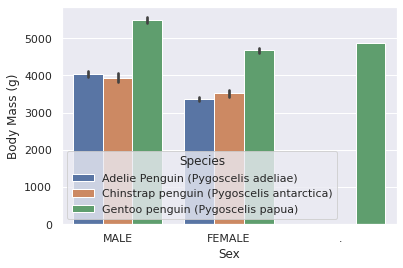

In [23]:
sns.set_theme(style="darkgrid")
sns.barplot('Sex', 'Body Mass (g)','Species', data=df_penguins);